# Lecture 9 II– Spring 2024

In [182]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [183]:
# load your required Librariess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
# read dataframe
wb=pd.read_csv("/content/drive/MyDrive/DataScience_with_KS/Pandas Work/Visualization/Assignment 2/Copy of world_bank.csv")

In [185]:
# code here
wb.shape

(166, 48)

In [186]:
wb.head()

,Unnamed: 0,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
4,5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0


In [187]:
wb.drop(columns="Unnamed: 0",inplace=True)

In [188]:
wb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 47 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                           --------------  -----  
 0   Continent                                                                                                                        166 non-null    object 
 1   Country                                                                                                                          166 non-null    object 
 2   Primary completion rate: Male: % of relevant age group: 2015                                                                     136 non-null    float64
 3   Primary completion rate: Female: % of relevant age group: 2015                                      

## Bar Plots

We often use bar plots to display **distributions** of a **categorical variable**.

In the examples below, we plot the distribution of the `"Continent"` column. The cell below uses `.value_counts()` to determine the number of countries corresponding to each continent in the dataset.

Text(0.5, 1.0, 'Distribution of countries accross the continents')

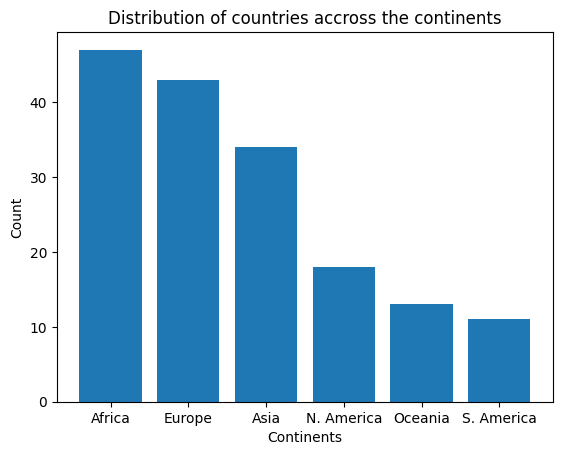

In [189]:
Continents=wb["Continent"].value_counts()
plt.bar(Continents.index,Continents.values)
plt.ylabel("Count")
plt.xlabel("Continents")
plt.title("Distribution of countries accross the continents")

## Histograms

You are likely familiar with histograms. A histogram collects continuous data into bins, then plots this binned data. Each bin reflects the density of datapoints with values that lie between the left and right ends of the bin.

In [190]:
#code here

We can overlay histograms (or density curves) to compare distributions across qualitative categories.

The `hue` parameter of `sns.histplot` specifies the column that should be used to determine the color of each category. `hue` can be used in many Seaborn plotting functions.

Notice that the resulting plot includes a legend describing which color corresponds to each hemisphere – a legend should always be included if color is used to encode information in a visualization!

(array([98., 25.,  9.,  2.,  5.,  8.,  6.,  0.,  0.,  4.]),
 array([  280.,  8485., 16690., 24895., 33100., 41305., 49510., 57715.,
        65920., 74125., 82330.]),
 <BarContainer object of 10 artists>)

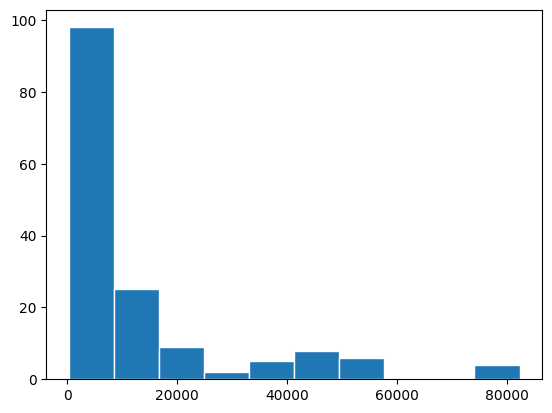

In [191]:
hist=plt.hist(wb["Gross national income per capita, Atlas method: $: 2016"],edgecolor="white",bins=10)
hist

(array([7.60760295e-05, 1.94071504e-05, 6.98657413e-06, 1.55257203e-06,
        3.88143007e-06, 6.21028812e-06, 4.65771609e-06, 0.00000000e+00,
        0.00000000e+00, 3.10514406e-06]),
 array([  280.,  8485., 16690., 24895., 33100., 41305., 49510., 57715.,
        65920., 74125., 82330.]),
 <BarContainer object of 10 artists>)

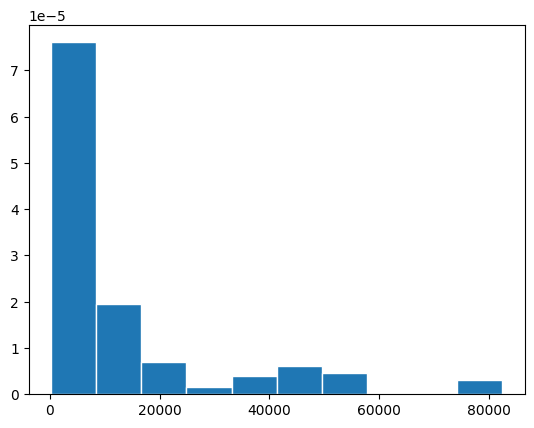

In [192]:
# Draw histogram of Gross national income
# The `edgecolor` argument controls the color of the bin edges
hist=plt.hist(wb["Gross national income per capita, Atlas method: $: 2016"],density=True,edgecolor="white",bins=10)
hist
# Add labels



In [193]:
wb.Continent.value_counts()

,count
Continent,
Africa,47
Europe,43
Asia,34
N. America,18
Oceania,13
S. America,11


In [194]:
# Create a new variable to store the hemisphere in which each country is located i.e. either Northern, Southern
southern=["Oceania","Africa","S. America"]
new_col=[]
for continent in wb["Continent"]:
  if continent in southern:
    new_col.append("southern")
  else:
    new_col.append("northern")
wb["hemisphere"]=new_col

In [195]:
wb.sample(10)

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015,hemisphere
112,Europe,Norway,98.0,98.0,100.0,100.0,NaN,NaN,NaN,NaN,...,98.0,95.0,95.0,NaN,NaN,NaN,NaN,84.0,87.0,northern
124,N. America,Antigua and Barbuda,87.0,82.0,88.0,94.0,NaN,NaN,98.0,99.0,...,NaN,98.0,99.0,NaN,NaN,NaN,NaN,67.0,87.0,northern
154,Oceania,Vanuatu,90.0,98.0,51.0,55.0,95.0,96.0,86.0,83.0,...,58.0,53.0,64.0,72.0,41.0,51.0,5.1,87.0,82.0,southern
55,Asia,Iraq,NaN,NaN,NaN,NaN,83.0,81.0,86.0,73.0,...,86.0,57.0,58.0,74.0,26.0,NaN,NaN,92.0,52.0,northern
121,Europe,Switzerland,94.0,97.0,95.0,99.0,NaN,NaN,NaN,NaN,...,100.0,94.0,97.0,NaN,NaN,NaN,NaN,NaN,87.0,northern
22,Africa,Malawi,79.0,80.0,22.0,20.0,74.0,70.0,72.0,51.0,...,41.0,87.0,88.0,74.0,57.0,42.7,37.6,85.0,47.0,southern
123,Europe,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,95.0,96.0,NaN,NaN,NaN,NaN,81.0,89.0,northern
151,Oceania,Solomon Islands,89.0,89.0,70.0,71.0,NaN,NaN,NaN,NaN,...,30.0,92.0,98.0,NaN,NaN,NaN,NaN,91.0,80.0,southern
119,Europe,Spain,99.0,100.0,91.0,97.0,100.0,100.0,99.0,97.0,...,100.0,96.0,97.0,NaN,NaN,NaN,NaN,58.0,73.0,northern
14,Africa,Ghana,101.0,101.0,80.0,75.0,88.0,83.0,78.0,65.0,...,15.0,89.0,88.0,53.0,42.0,46.6,48.5,85.0,33.0,southern


(array([7.60760295e-05, 1.94071504e-05, 6.98657413e-06, 1.55257203e-06,
        3.88143007e-06, 6.21028812e-06, 4.65771609e-06, 0.00000000e+00,
        0.00000000e+00, 3.10514406e-06]),
 array([  280.,  8485., 16690., 24895., 33100., 41305., 49510., 57715.,
        65920., 74125., 82330.]),
 <BarContainer object of 10 artists>)

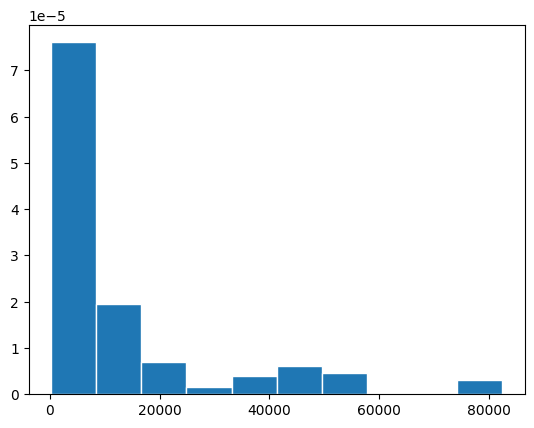

In [196]:
plt.hist(wb["Gross national income per capita, Atlas method: $: 2016"],density=True,edgecolor="white",bins=10,label=wb["hemisphere"])


<Axes: xlabel='Gross national income per capita, Atlas method: $: 2016', ylabel='Density'>

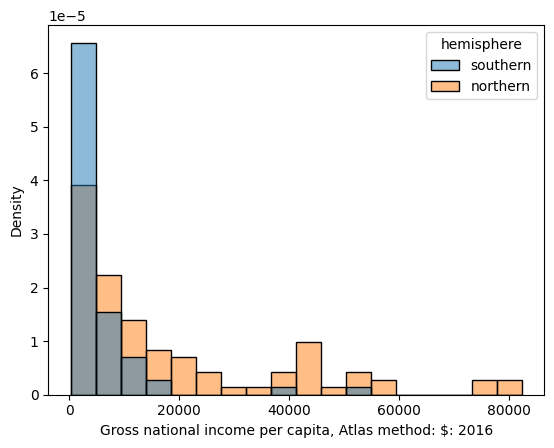

In [197]:
# Create histogram for Gross national Income, usse New created column as hue parameter in .histplot function

sns.histplot(x=wb["Gross national income per capita, Atlas method: $: 2016"],hue=wb["hemisphere"],stat="density")

Each bin of a histogram is scaled such that its area is equal to the percentage of all datapoints that it contains.

Text(0, 0.5, 'Density')

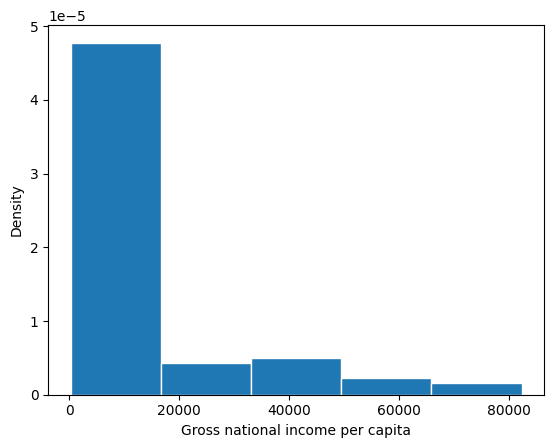

In [198]:
densities, bins, _ = plt.hist(wb["Gross national income per capita, Atlas method: $: 2016"], density=True, edgecolor="white", bins=5)
plt.xlabel("Gross national income per capita")
plt.ylabel("Density")
# calculate data points in 1st bin


In [199]:
height=densities
# width=bins[1]-bins[0]
width=np.diff(bins)
area=height*width*100
area

array([78.34394904,  7.00636943,  8.28025478,  3.82165605,  2.5477707 ])

We describe a "mode" of a histogram as a peak in the distribution. Often, however, it is difficult to determine what counts as its own "peak." For example, the number of peaks in the distribution of HIV rates across different countries varies depending on the number of histogram bins we plot.

In [200]:
# Rename the very long column name for convenience
wb.rename(columns={"Antiretroviral therapy coverage: % of people living with HIV: 2015":"HIV rate"},inplace=True)
# With 5 bins, it seems that there is only one peak


Text(0.5, 1.0, 'With 5 bins')

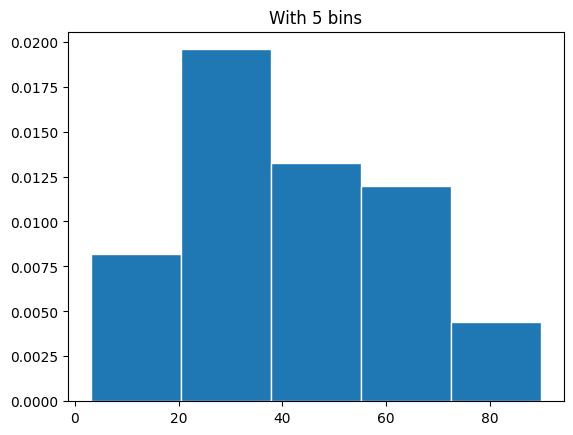

In [208]:
plt.hist(wb["HIV rate"],density=True,bins=5,edgecolor="white")
plt.title("With 5 bins")

Text(0.5, 1.0, 'With 5 bins')

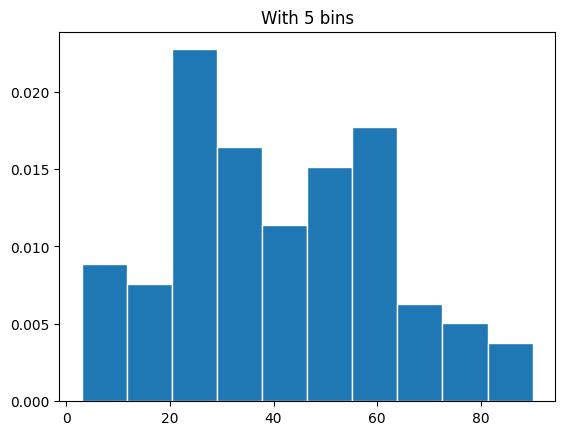

In [209]:
# With 10 bins, there seem to be two peaks
plt.hist(wb["HIV rate"],density=True,bins=10,edgecolor="white")
plt.title("With 10 bins")

Text(0.5, 1.0, 'With 20 bins')

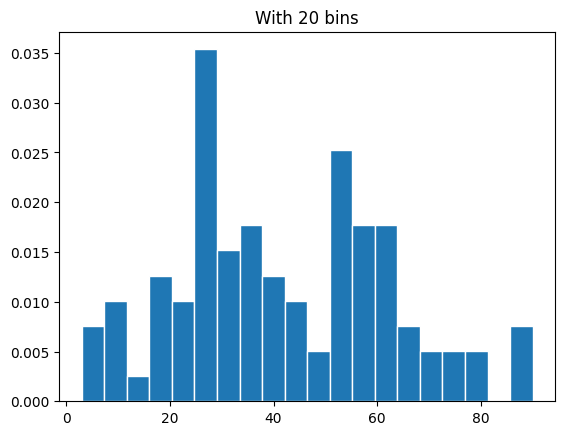

In [210]:
# And with 20 bins, it becomes hard to say what counts as a "peak"!

plt.hist(wb["HIV rate"],density=True,bins=20,edgecolor="white")
plt.title("With 20 bins")

As this example illustrates, it is sometimes more useful to understand the general structure of our data, rather than focus on individual observations. Kernel density estimation helps with this goal.

## Kernel Density Estimation

Kernel density estimation (KDE) allows us to "smooth" a distribution to display general trends and eliminate noisy, distracting detail.

In [204]:
# The smooth curve overlaid on the histogram is a KDE


To illustrate the process of constructing a KDE curve, we'll use a fake dataset of just five datapoints, contained in the list `points`.

In [205]:
points = [2.2, 2.8, 3.7, 5.3, 5.7]

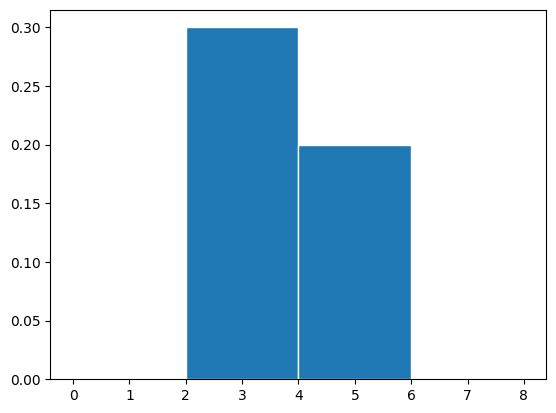

In [206]:
plt.hist(points, bins=range(0, 10, 2), ec='w', density=True);

Let's define some **kernels**. We will explain these formulas momentarily. We'll also define some helper functions for visualization purposes.

In [207]:
def gaussian(x, z, a):
    # Code Here

def boxcar_basic(x, z, a):
    # Code Here

    return 0

def boxcar(x, z, a):
    # Code Here


IndentationError: expected an indented block after function definition on line 1 (<ipython-input-207-35905a876321>, line 4)

In [ ]:
def create_kde(kernel, pts, a):
    # Code Here

def plot_kde(kernel, pts, a):
    # Code Here

def plot_separate_kernels(kernel, pts, a, norm=False):
    # Code Here


Here are our five points represented as vertical bars.

### Step 1: Place a kernel at each point

We'll start with the Gaussian kernel.

In [ ]:
# code Here

### Step 2: Normalize kernels so that total area is 1

In [ ]:
# Code Here

### Step 3: Sum all kernels together

In [ ]:
# code here

This looks identical to the smooth curve that `sns.distplot` gives us (when we set the appropriate parameter):

In [ ]:
# code Here

You can also get a very similar result in a single call by requesting the KDE be added to the histogram, with `kde=True` and some extra keywords:

In [ ]:
# code Here

In [ ]:
# code Here

## Kernels

**Gaussian**

$$K_{\alpha}(x, x_i) = \frac{1}{\sqrt{2 \pi \alpha^2}} e^{-\frac{(x - x_i)^2}{2\alpha^2}}$$


**Boxcar**


$$K_{\alpha}(x, x_i) = \begin {cases}
			\frac{1}{\alpha}, \: \: \: |x - x_i| \leq \frac{\alpha}{2}\\
			0, \: \: \: \text{else}
			\end{cases}$$

In [ ]:
# code Here

In [ ]:
# code Here

## Effect of bandwidth hyperparameter $\alpha$

Let's bring in some (different) toy data.

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

In [ ]:
# code Here

In [ ]:
#code Here

### KDE Formula

$$f_{\alpha}(x) = \sum_{i = 1}^n \frac{1}{n} \cdot K_{\alpha}(x, x_i) =  \frac{1}{n} \sum_{i = 1}^n K_{\alpha}(x, x_i)$$

In [ ]:
# Code Here

In [ ]:
# code Here

In [ ]:
# Code Here

In [ ]:
# code Here